<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/RNN-Basics/blob/main/Stock_price_prediction_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import tensorflow as tf

In [82]:
import yfinance as yf
df = yf.download('AAPL', start='2018-01-01', end='2025-01-01')
stock_prices = df['Close'].values

/tmp/ipython-input-768787072.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2018-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


In [83]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [84]:
scaled_data = scaler.fit_transform(stock_prices.reshape(-1,1))

In [85]:
def create_sequence(data, window):
 local_x = []
 local_y = []

 for i in range(len(data)-window):
    local_x.append(data[i:i+window])
    local_y.append(data[i+window])

 reshaped_x = np.array(local_x).reshape(-1,window,1)
 reshaped_y = np.array(local_y)
 return reshaped_x, reshaped_y

In [86]:
window = 7
x, y = create_sequence(scaled_data, window)

In [87]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [98]:
seperate_index = int(len(x) * 0.8 )
x_train, x_test = x[:seperate_index], x[seperate_index:]
y_train, y_test = y[:seperate_index], y[seperate_index:]

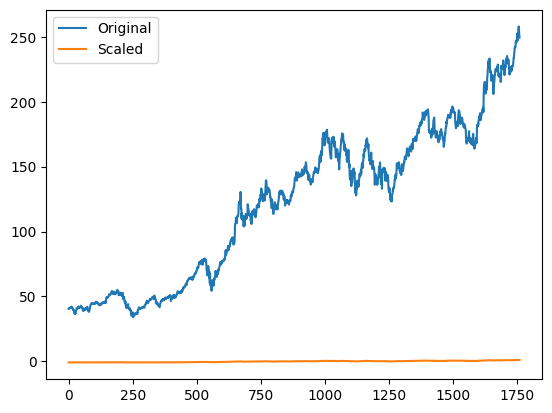

In [99]:
plt.plot(stock_prices, label='Original')
plt.plot(scaled_data, label='Scaled')
plt.legend()
plt.show()

In [100]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.SimpleRNN(100, return_sequences=False, input_shape=(window, 1)),
        tf.keras.layers.Dense(1)
    ]
)

model.compile(optimizer=tf.keras.optimizers.Adam(), loss= tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.MeanAbsoluteError, tf.keras.metrics.RootMeanSquaredError])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [106]:
model.fit(x_train, y_train, epochs=75, validation_data=(x_test, y_test))

Epoch 1/75
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1468e-04 - mean_absolute_error: 0.0149 - root_mean_squared_error: 0.0204 - val_loss: 6.4445e-04 - val_mean_absolute_error: 0.0194 - val_root_mean_squared_error: 0.0254
Epoch 2/75
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3292e-04 - mean_absolute_error: 0.0141 - root_mean_squared_error: 0.0208 - val_loss: 6.0268e-04 - val_mean_absolute_error: 0.0181 - val_root_mean_squared_error: 0.0245
Epoch 3/75
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0281e-04 - mean_absolute_error: 0.0142 - root_mean_squared_error: 0.0201 - val_loss: 6.0652e-04 - val_mean_absolute_error: 0.0185 - val_root_mean_squared_error: 0.0246
Epoch 4/75
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8448e-04 - mean_absolute_error: 0.0140 - root_mean_squared_error: 0.0196 - val_loss: 6.0677e-04 - val_mean_absolute_error: 0.0181 - val_root_mean_squared_error: 0.0246
Epoch 5/75
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3048e-04 - mean_absolute_err

In [107]:
y_pred_scaled = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test)
print(y_pred[:5])
print(y_test_actual[:5])
print(mean_absolute_error(y_test_actual, y_pred))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[176.7499 ]
 [176.1008 ]
 [176.69434]
 [178.34563]
 [176.18645]]
[[176.00602722]
 [176.06544495]
 [177.7192688 ]
 [175.72874451]
 [174.85726929]]
1.9857390314085877


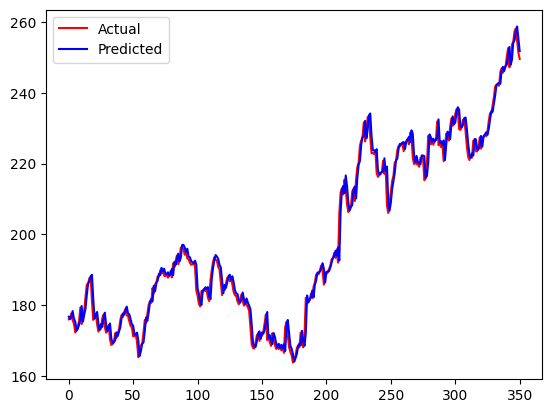

In [109]:
plt.plot(y_test_actual, label='Actual', c='r')
plt.plot(y_pred, label='Predicted', c='b')
plt.legend()
plt.show()

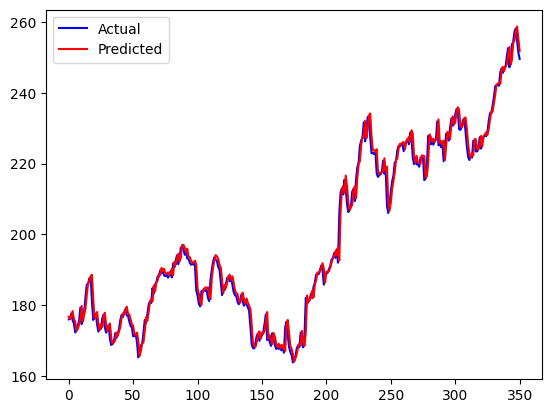

In [110]:
plt.plot(y_test_actual, label='Actual', c='b')
plt.plot(y_pred, label='Predicted', c='r')
plt.legend()
plt.show()